## Purpose of the Notebook

Compare the elastic tensile test performance of tungsten heavy alloy (THA) with the performance of nominal tungsten, K-Doped, and K-Doped 3% Re alloy.

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import warnings
from typing import List, Tuple
import sys
sys.path.append('../')
from common_util import NogamiUTSData,NogamiUEData,ProjectPaths,setup_plotting_format,setup_axis_default
import pandas as pd
#ignore warnings and set preference for matplotlib styles
warnings.filterwarnings("ignore")
setup_plotting_format()
paths = ProjectPaths()

### Ultimate Tensile Stress

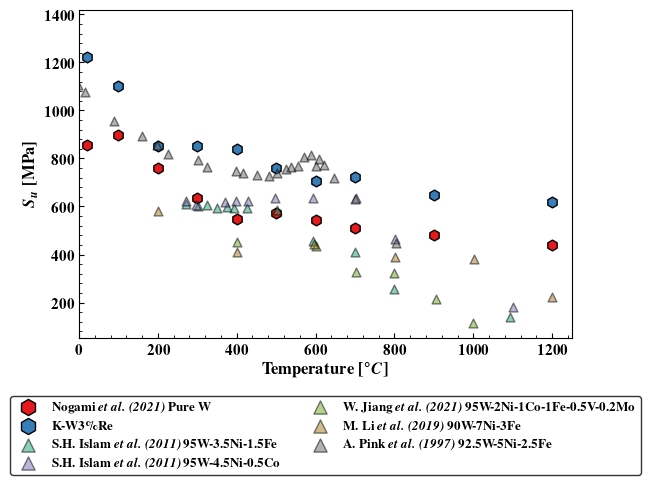

In [3]:
data = NogamiUTSData()

nogami_alloys = {'W Plate (H)': r'Nogami \textit{et al. (2021)} Pure W',
                 'K-W3%Re Plate (H)': r'K-W3\%Re'}

tha = {'islam_data/uts_95W3.5Ni1.5Fe.csv': r'S.H. Islam \textit{et al. (2011)} 95W-3.5Ni-1.5Fe',
       'islam_data/uts_95W4.5Ni0.5Co.csv': r'S.H. Islam \textit{et al. (2011)} 95W-4.5Ni-0.5Co',
       'jiang_data/uts.csv': r'W. Jiang \textit{et al. (2021)} 95W-2Ni-1Co-1Fe-0.5V-0.2Mo',
       'li_data/uts.csv':r'M. Li \textit{et al. (2019)} 90W-7Ni-3Fe',
       'pink_data/uts.csv': r'A. Pink \textit{et al. (1997)} 92.5W-5Ni-2.5Fe'}

colors = plt.get_cmap('Set1')([0.0,0.2])
fig,(ax,legend_axes) = plt.subplots(nrows = 2,figsize = (6.5,5.0),height_ratios= [1.,0.2])
setup_axis_default(ax)
ax.set_xlabel(r'\textbf{Temperature [$^\circ C$]}',fontsize = 12)
ax.set_ylabel(r'\textbf{$S_u$ [MPa]}',fontsize = 12)

for i,alloy in enumerate(nogami_alloys):
       df = data.get_df(alloy)
       ax.scatter(df.index,df.to_numpy(),
               label = r'\textbf{' + nogami_alloys[alloy] + '}',facecolor = colors[i],
               marker = 'h',s = 60,edgecolor = 'k')


colors = plt.get_cmap('Dark2')(np.linspace(0,1,len(tha)))
for i,tha_data in enumerate(tha):
       df = pd.read_csv(paths.STRUCTURAL_DATA.joinpath('tha',tha_data),index_col = 0)
       ax.scatter(df.index,df.to_numpy(),label = r'\textbf{' + tha[tha_data] + '}',color = colors[i],edgecolor ='k',
               s = 40, marker = '^',alpha = 0.5)

ax.set_xlim([0,1250])
handles,labels = ax.get_legend_handles_labels()
legend = legend_axes.legend(handles = handles,
                          labels = [r'\textbf{' + label + '}' for label in labels],
                          loc = 'center',ncol = 2,fontsize = 9.5,markerscale = 1.5)  

legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(1.0)

legend_axes.axis('off')     
fig.tight_layout()
fig.savefig(paths.IMAGES.joinpath('tha_uts_comparison.svg'))    

### Uniform Elongation

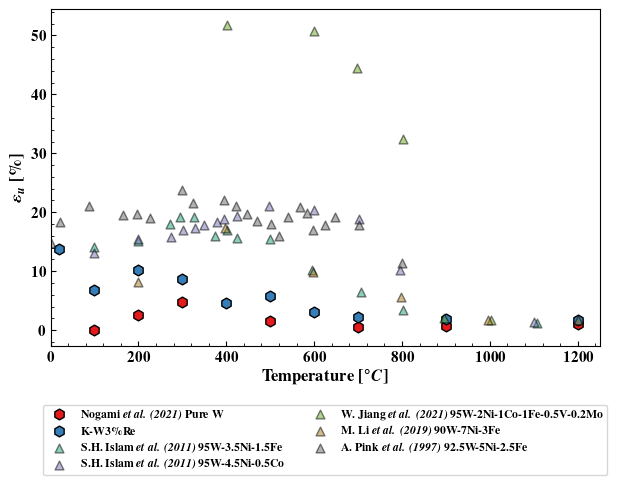

In [24]:
data = NogamiUEData()

nogami_alloys = {'W Plate (H)': r'Nogami \textit{et al. (2021)} Pure W',
                 'K-W3%Re Plate (H)': r'K-W3\%Re'}

tha = {'islam_data/ue_95W3.5Ni1.5Fe.csv': r'S.H. Islam \textit{et al. (2011)} 95W-3.5Ni-1.5Fe',
       'islam_data/ue_95W4.5Ni0.5Co.csv': r'S.H. Islam \textit{et al. (2011)} 95W-4.5Ni-0.5Co',
       'jiang_data/ue.csv': r'W. Jiang \textit{et al. (2021)} 95W-2Ni-1Co-1Fe-0.5V-0.2Mo',
       'li_data/ue.csv':r'M. Li \textit{et al. (2019)} 90W-7Ni-3Fe',
       'pink_data/ue.csv': r'A. Pink \textit{et al. (1997)} 92.5W-5Ni-2.5Fe'}

colors = plt.get_cmap('Set1')([0.0,0.2])
fig,(ax,legend_axes) = plt.subplots(nrows = 2,figsize = (6.5,5.0),height_ratios= [1.,0.2])
setup_axis_default(ax)
ax.set_xlabel(r'\textbf{Temperature [$^\circ C$]}',fontsize = 12)
ax.set_ylabel(r'\textbf{$\varepsilon_u$ [\%]}',fontsize = 12)

for i,alloy in enumerate(nogami_alloys):
       df = data.get_df(alloy)
       ax.scatter(df.index,df.to_numpy(),
               label = r'\textbf{' + nogami_alloys[alloy] + '}',facecolor = colors[i],
               marker = 'h',s = 60,edgecolor = 'k')


colors = plt.get_cmap('Dark2')(np.linspace(0,1,len(tha)))
for i,tha_data in enumerate(tha):
       df = pd.read_csv(paths.STRUCTURAL_DATA.joinpath('tha',tha_data),index_col = 0)
       ax.scatter(df.index,df.to_numpy(),label = r'\textbf{' + tha[tha_data] + '}',color = colors[i],edgecolor ='k',
               s = 40, marker = '^',alpha = 0.5)

ax.set_xlim([0,1250])
handles,labels = ax.get_legend_handles_labels()
legend_axes.legend(handles = handles,loc = 'center',ncol = 2,fontsize = 8.5)

legend_axes.axis('off')     
fig.tight_layout()
fig.savefig(paths.IMAGES.joinpath('tha_ue_comparison.svg'))    